In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, chi2

In [2]:
data_path = "../data/"
X_train = pd.read_csv(os.path.join(data_path, "X_train.csv"))
X_test = pd.read_csv(os.path.join(data_path, "X_test.csv"))
y_train = pd.read_csv(os.path.join(data_path, "y_train.csv"))
y_test = pd.read_csv(os.path.join(data_path, "y_test.csv"))

# 1. Use Feature Importance (Random Forest / XGBoost feature importance scores) to rank variables.
**Steps:**
* Train a tree-based model (e.g., RandomForest).
* Extract feature importance scores from the model.
* Rank features based on their importance.

In [3]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

c:\Users\mazen\anaconda3\envs\heart_env\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [4]:
feature_importances = rf.feature_importances_
importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

importances_df

,Feature,Importance
0,0,0.228306
5,5,0.119775
4,4,0.093326
3,3,0.075312
10,10,0.074069
6,6,0.065756
1,1,0.056809
11,11,0.051147
9,9,0.050705
12,12,0.049968


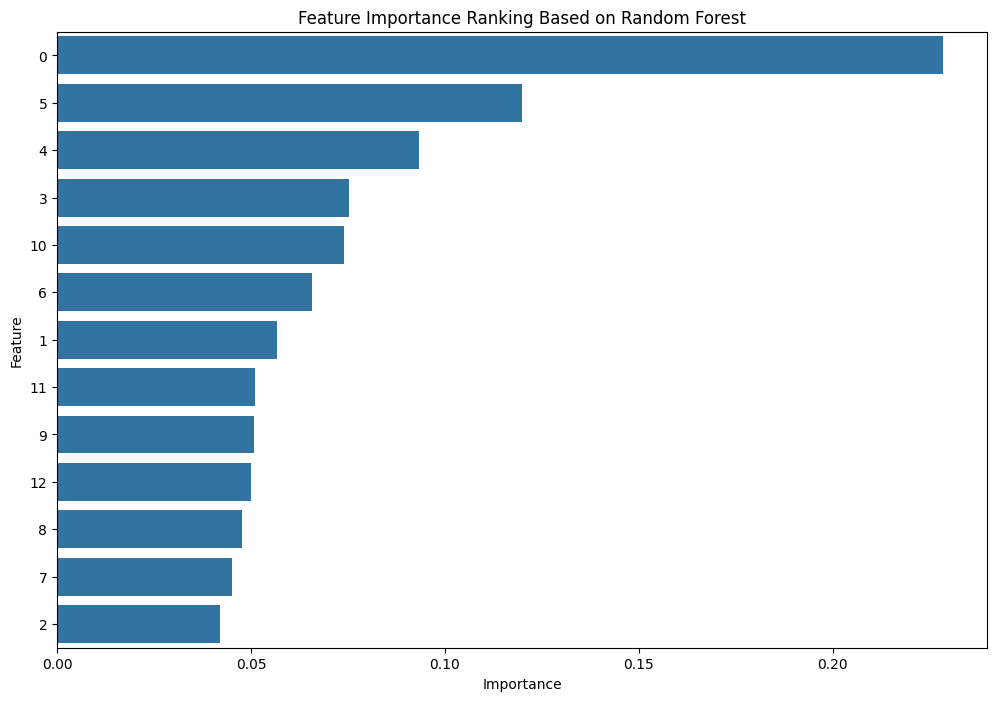

In [5]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.title('Feature Importance Ranking Based on Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

**Results:**

* Identified the most influential features.
* Ranked features show which inputs have the strongest impact on the target.
* Reduced feature set to keep only the top-ranked variables.

---

# 2. Apply Recursive Feature Elimination (RFE) to select the best predictors.
**Steps:**
* Initialize RFE with the chosen model and desired number of features.
* Fit RFE on the training dataset.
* Rank features based on importance scores from the model.
* Select the top predictors according to RFE ranking.

In [6]:
num_features_to_select = 10
rfe_selector = RFE(estimator=rf, n_features_to_select=num_features_to_select, step=1)

rfe_selector.fit(X_train, y_train)

selected_features_rfe_mask = rfe_selector.support_
selected_features_rfe = X_train.columns[selected_features_rfe_mask].tolist()
feature_ranking_rfe = rfe_selector.ranking_

selected_features = X_train.columns[rfe_selector.support_]

print("Selected Features:")
print(selected_features)

c:\Users\mazen\anaconda3\envs\heart_env\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\mazen\anaconda3\envs\heart_env\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\mazen\anaconda3\envs\heart_env\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\mazen\anaconda3\envs\heart_env\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was

Selected Features:
Index(['0', '1', '3', '4', '5', '6', '7', '9', '10', '11'], dtype='object')


In [7]:
rfe_ranking_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Ranking': feature_ranking_rfe,
    'Selected_by_RFE': selected_features_rfe_mask
}).sort_values(by='Ranking', ascending=True)

print(f"Features Selected by RFE (Top {num_features_to_select}):")
print(rfe_ranking_df[rfe_ranking_df['Selected_by_RFE']])

Features Selected by RFE (Top 10):
   Feature  Ranking  Selected_by_RFE
0        0        1             True
1        1        1             True
3        3        1             True
4        4        1             True
6        6        1             True
5        5        1             True
7        7        1             True
9        9        1             True
11      11        1             True
10      10        1             True


**Results:**

* RFE successfully identified the most relevant predictors.
* Less important features were dropped step by step.
* Final feature set is smaller but more informative.
* This selection reduces overfitting risk.

---

# 3. Use Chi-Square Test to check feature significance.
**Steps:**
* Normally, Chi-Square is applied to categorical features to test their relationship with the target.
* In this dataset, no categorical predictors are available for this test any more.

**Results:**

* Chi-Square test was skipped.
* No categorical features to apply this method on.

---

# 4. Select only the most relevant features for modeling.
**Steps:**

* Combine the results from previous selection methods.
* Keep only the top-ranked and most informative features.
* Drop low-importance or redundant predictors.
* Prepare the reduced dataset for model training.

In [8]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

X_train_selected.to_csv(os.path.join(data_path, "X_train_selected.csv"), index=False)
X_test_selected.to_csv(os.path.join(data_path, "X_test_selected.csv"), index=False)

**Results:**

* Final dataset includes only the strongest predictors.
* Less noise and redundancy in the data.
* Ready to train models with improved efficiency.